<a href="https://colab.research.google.com/github/AkshayaChitra/Akshaya/blob/main/Leather_Defect_Detection_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DATASET

In [ ]:
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/WhatsApp Chat with Sadiq.gdoc
/content/drive/MyDrive/abi 
/content/drive/MyDrive/Sister Love Dialogue.mp3
/content/drive/MyDrive/Akka Thangachi - Shankar (1).mp3
/content/drive/MyDrive/Akka Thangachi - Shankar.mp3
/content/drive/MyDrive/Vadivel bgm.mp3
/content/drive/MyDrive/My Sweet Thangachi My Sweet Akka - Dialogue.mp3
/content/drive/MyDrive/Vadivelu Anbu Full Movie Comedy Vadivelu Political Comedy Vadivelu Comedy Cini Mini Comedy.mp3
/content/drive/MyDrive/Thank You For Being Best Sister - Unkoodave Porakkanum (Sisters Version).mp3
/content/drive/MyDrive/Easan Kannil Anbai.mp3
/content/drive/MyDrive/Vadivelu Kanavithuthan Nijam.mp3
/content/drive/MyDrive/Breakup Song Bgm.mp3
/content/drive/MyDrive/certificate (1).pdf
/content/drive/MyDrive/Snapchat-935498297 (1).jpg
/content/drive/MyDrive/Snapchat-552436393 (1).jpg
/content/drive/MyDrive/IMG_20210821_232227 (1).jpg
/content/drive/MyDrive/IMG20210317193100 (1).jpg
/content/drive/MyDrive/IMG-20211011-WA0094 (1)

In [ ]:
dataset_path = '/content/drive/My Drive/Leather Defect Classification'
dataset_path

'/content/drive/My Drive/Leather Defect Classification'

DATA PREPARATION FOR TRAINING AND VALIDATION SPLIT

In [ ]:
# Step 3: Initialize ImageDataGenerator with rescaling and validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 20% of data for validation
)

In [ ]:
# Step 4: Create the data generators
# These generators will automatically load images from the dataset path and apply rescaling
train_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

Found 2880 images belonging to 6 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 720 images belonging to 6 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

Class names: ['Folding marks', 'Grain off', 'Growth marks', 'loose grains', 'non defective', 'pinhole']


VIZUALIZATION OF DATASET

Images shape: (32, 227, 227, 3)
Labels shape: (32, 6)


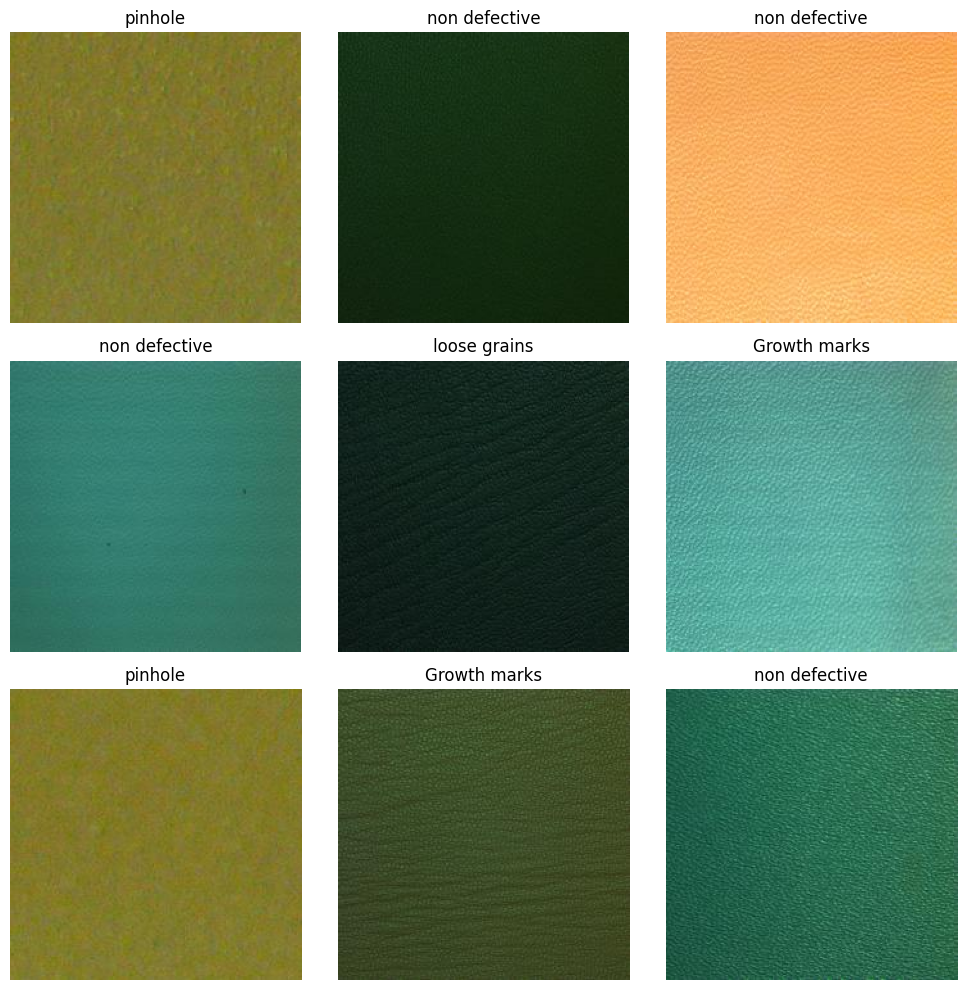

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve a batch of images and labels
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())  # Get class names

# Check the shape of the images and labels
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Number of images to display
num_images = 9
plt.figure(figsize=(10, 10))

for i in range(min(num_images, images.shape[0])):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()


BUILDING THE MODELS

CNN MODEL


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

RNN Model

In [ ]:
def create_resnet_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

VGG Model

In [ ]:
def create_vgg_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

AlexNet Model

In [ ]:
def create_alexnet_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional Layers
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to reduce overfitting
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification

    return model

In [ ]:
input_shape = (227, 227, 3)
num_classes = 6

In [ ]:
cnn_model = create_cnn_model(input_shape, num_classes)
resnet_model = create_resnet_model(input_shape, num_classes)
vgg_model = create_vgg_model(input_shape, num_classes)
alexnet_model = create_alexnet_model(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


COMPILING AND FITIING THE MODELS

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 29s 250ms/step - accuracy: 0.5150 - loss: 1.1194 - val_accuracy: 0.5833 - val_loss: 1.1138
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.6958 - loss: 0.6714 - val_accuracy: 0.6694 - val_loss: 1.2096
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.7999 - loss: 0.4552 - val_accuracy: 0.7389 - val_loss: 1.2279
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.8106 - loss: 0.4387 - val_accuracy: 0.6139 - val_loss: 1.7622
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - accuracy: 0.8296 - loss: 0.3933 - val_accuracy: 0.7167 - val_loss: 0.9228
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.8336 - loss: 0.3586 - val_accuracy: 0.6653 - val_loss: 1.4125
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.8603 - loss: 0.3190 - val_accuracy: 0.6514 - val_loss: 1.3797
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.8345 - loss: 0.3728 - val_accu

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet = resnet_model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - accuracy: 0.1710 - loss: 1.8910 - val_accuracy: 0.3181 - val_loss: 1.8286
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - accuracy: 0.1997 - loss: 1.8213 - val_accuracy: 0.1667 - val_loss: 1.7659
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.2115 - loss: 1.7729 - val_accuracy: 0.3042 - val_loss: 1.7707
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.2420 - loss: 1.7529 - val_accuracy: 0.2083 - val_loss: 1.7355
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.2331 - loss: 1.7428 - val_accuracy: 0.1917 - val_loss: 1.7177
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.2815 - loss: 1.7106 - val_accuracy: 0.2917 - val_loss: 1.6851
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.2518 - loss: 1.7069 - val_accuracy: 0.3250 - val_loss: 1.6904
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.3011 - loss: 1.6771 - val_accu

In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg = vgg_model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 564ms/step - accuracy: 0.3104 - loss: 1.7735 - val_accuracy: 0.4458 - val_loss: 1.2967
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.5119 - loss: 1.1450 - val_accuracy: 0.3431 - val_loss: 1.4129
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 345ms/step - accuracy: 0.5526 - loss: 1.0225 - val_accuracy: 0.5694 - val_loss: 1.1127
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 347ms/step - accuracy: 0.6689 - loss: 0.7981 - val_accuracy: 0.5667 - val_loss: 1.0757
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 346ms/step - accuracy: 0.6677 - loss: 0.7993 - val_accuracy: 0.6958 - val_loss: 0.9765
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 372ms/step - accuracy: 0.6856 - loss: 0.7658 - val_accuracy: 0.6000 - val_loss: 1.3071
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 347ms/step - accuracy: 0.7492 - loss: 0.6328 - val_accuracy: 0.6681 - val_loss: 0.9731
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 344ms/step - accuracy: 0.7972 - loss: 0.5463 - val_accu

In [ ]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_alexnet = alexnet_model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.2575 - loss: 2.0691 - val_accuracy: 0.3139 - val_loss: 1.6670
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 167ms/step - accuracy: 0.3107 - loss: 1.4730 - val_accuracy: 0.1819 - val_loss: 1.5793
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.2818 - loss: 1.5104 - val_accuracy: 0.3250 - val_loss: 1.5468
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.2939 - loss: 1.4751 - val_accuracy: 0.3333 - val_loss: 1.5491
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.3216 - loss: 1.4656 - val_accuracy: 0.3361 - val_loss: 1.7622
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.2831 - loss: 1.5063 - val_accuracy: 0.3153 - val_loss: 1.7106
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.3061 - loss: 1.5248 - val_accuracy: 0.3153 - val_loss: 1.5313
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.3449 - loss: 1.4380 - val_accu

VIZUALIZATION OF ALL MODELS

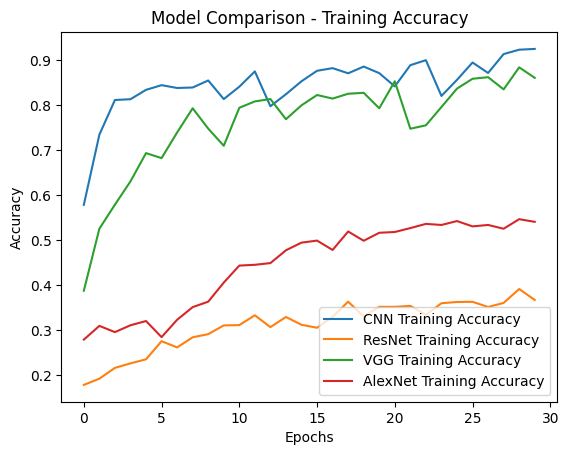

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_resnet.history['accuracy'], label='ResNet Training Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Training Accuracy')
plt.plot(history_alexnet.history['accuracy'], label='AlexNet Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Training Accuracy')
plt.legend()
plt.show()

MODEL EVALUATION

In [ ]:
# Print accuracy for CNN model
cnn_accuracy = history_cnn.history['accuracy'][-1]
cnn_val_accuracy = history_cnn.history['val_accuracy'][-1]
print(f"CNN Model - Training Accuracy: {cnn_accuracy:.2f}, Validation Accuracy: {cnn_val_accuracy:.2f}")

# Print accuracy for ResNet model
resnet_accuracy = history_resnet.history['accuracy'][-1]
resnet_val_accuracy = history_resnet.history['val_accuracy'][-1]
print(f"ResNet Model - Training Accuracy: {resnet_accuracy:.2f}, Validation Accuracy: {resnet_val_accuracy:.2f}")

# Print accuracy for VGG model
vgg_accuracy = history_vgg.history['accuracy'][-1]
vgg_val_accuracy = history_vgg.history['val_accuracy'][-1]
print(f"VGG Model - Training Accuracy: {vgg_accuracy:.2f}, Validation Accuracy: {vgg_val_accuracy:.2f}")

# Print accuracy for AlexNet model
alexnet_accuracy = history_alexnet.history['accuracy'][-1]
alexnet_val_accuracy = history_alexnet.history['val_accuracy'][-1]
print(f"AlexNet Model - Training Accuracy: {alexnet_accuracy:.2f}, Validation Accuracy: {alexnet_val_accuracy:.2f}")

CNN Model - Training Accuracy: 0.93, Validation Accuracy: 0.73
ResNet Model - Training Accuracy: 0.37, Validation Accuracy: 0.34
VGG Model - Training Accuracy: 0.86, Validation Accuracy: 0.64
AlexNet Model - Training Accuracy: 0.54, Validation Accuracy: 0.43


In [ ]:
def create_resnet_model(input_shape, num_classes):
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')

    # Unfreeze the last few layers for fine-tuning
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
resnet_model = create_resnet_model(input_shape, num_classes)

In [ ]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_resnet = resnet_model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 97s 403ms/step - accuracy: 0.5075 - loss: 1.7058 - val_accuracy: 0.1667 - val_loss: 471.7202
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 336ms/step - accuracy: 0.6980 - loss: 0.8064 - val_accuracy: 0.1667 - val_loss: 4.2254
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 365ms/step - accuracy: 0.7090 - loss: 0.7493 - val_accuracy: 0.1667 - val_loss: 2.3092
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 345ms/step - accuracy: 0.7631 - loss: 0.6413 - val_accuracy: 0.1667 - val_loss: 7.6876
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 376ms/step - accuracy: 0.8374 - loss: 0.4220 - val_accuracy: 0.1667 - val_loss: 3.2091
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - accuracy: 0.8257 - loss: 0.4299 - val_accuracy: 0.1667 - val_loss: 2.5657
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 354ms/step - accuracy: 0.8658 - loss: 0.3289 - val_accuracy: 0.1667 - val_loss: 4.7826
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 352ms/step - accuracy: 0.8392 - loss: 0.3978 - val_ac

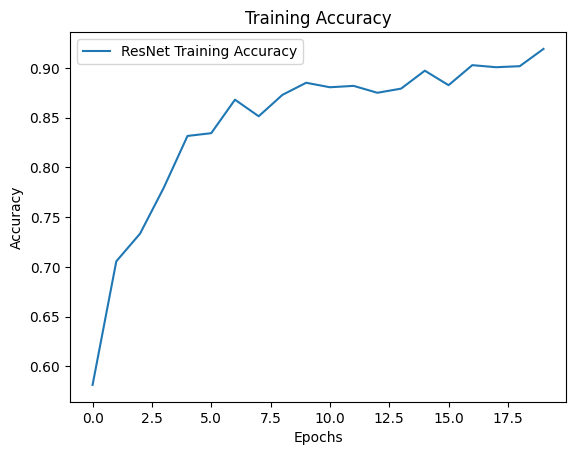

In [ ]:
plt.plot(history_resnet.history['accuracy'], label='ResNet Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [ ]:
resnet_accuracy = history_resnet.history['accuracy'][-1]
resnet_val_accuracy = history_resnet.history['val_accuracy'][-1]
print(f"ResNet Model - Training Accuracy: {resnet_accuracy:.2f}, Validation Accuracy: {resnet_val_accuracy:.2f}")

ResNet Model - Training Accuracy: 0.92, Validation Accuracy: 0.74
